# Part 7: Implementing the Mini-Batch Gradient Descent

In [105]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
sns.set_theme()

<Axes: xlabel='x', ylabel='y'>

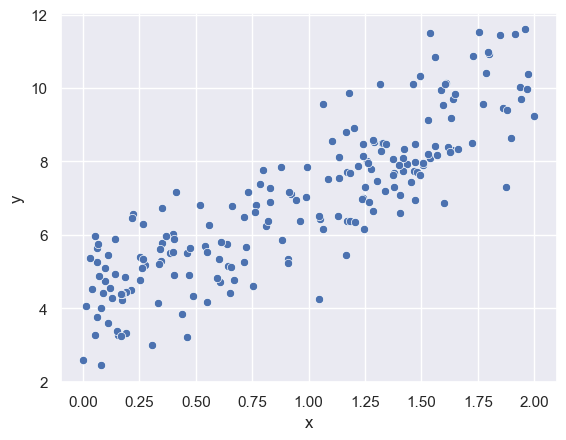

In [106]:
data = pd.DataFrame()

data["x"] = pd.read_csv("X.csv")
data["y"] = pd.read_csv("y.csv")

sns.scatterplot(data = data, x= "x" , y = "y")

In [107]:
x = data["x"].to_numpy()
y = data["y"].to_numpy()

run_mini_batch returns $\theta_k+1$ given $\theta_k$

In [109]:
def run_mini_batch(theta, learning_rate, batch_size, x, y):
    indices = np.random.choice(len(x), size=batch_size, replace=False)
    x_subset = x[indices]
    y_subset = y[indices]

    x_b = np.c_[np.ones(batch_size), x_subset]

    gradients = 2/batch_size * np.dot(x_b.T, np.dot(x_b, theta) - y_subset)
    theta_n = theta - learning_rate*gradients
    
    return theta_n

In [110]:
def get_mean_squared_error(theta, x, y):
    y_pred = theta[0] + theta[1]*x
    mse = np.sum((y-y_pred)**2) / len(x)
    
    return mse

In [111]:
def plot_batch(theta, current_iter, n_iterations):
    x_pred = np.arange(0,3, 0.5)
    y_pred = theta[0] + theta[1]*x_pred
    y_pred
    
    if current_iter != n_iterations - 1:
        sns.lineplot(x = x_pred, y = y_pred, color = "#4c72b0")
    else:
        sns.lineplot(x = x_pred, y = y_pred, label = f"Iteration: {current_iter+1}", color = "magenta")

In [112]:
learning_rate = 0.1
batch_sizes = [1, 5, 10]
n_iterations = 10

theta = np.empty((n_iterations, 2, len(batch_sizes)))
mse = np.empty((n_iterations, len(batch_sizes)))



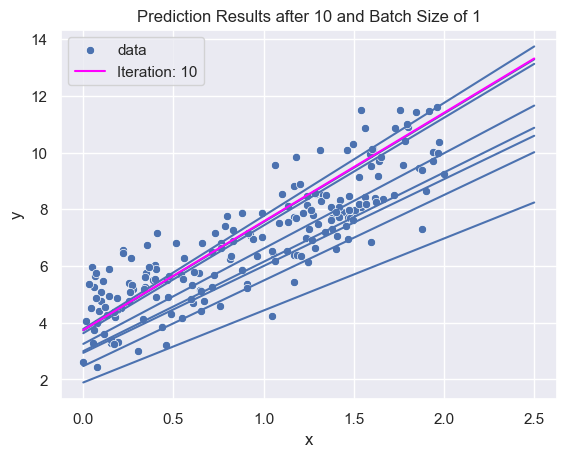

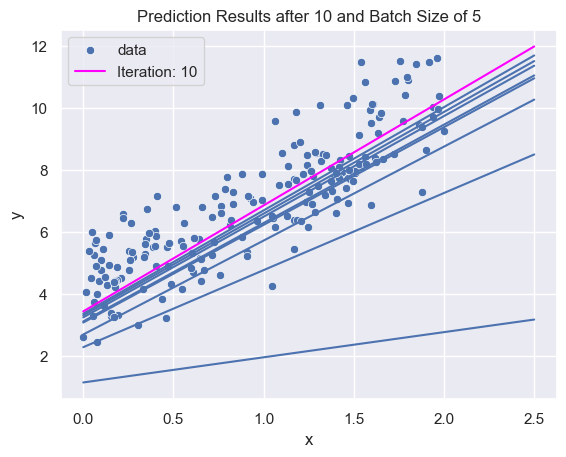

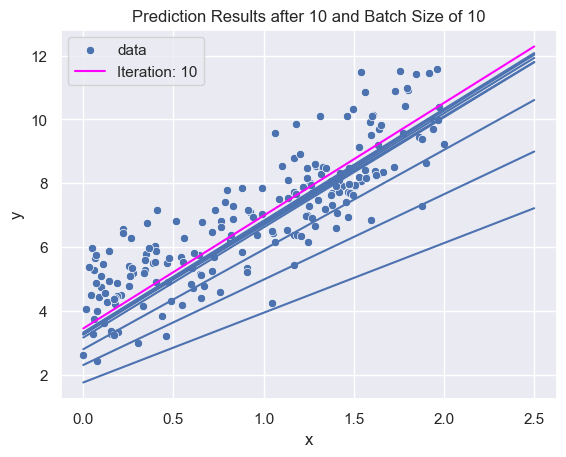

In [113]:
for b in range(len(batch_sizes)):
    sns.scatterplot(data=data, x="x", y="y", label="data")

    theta[0, :, b] = np.random.randn(2)
    mse[0, b] = get_mean_squared_error(theta[0, :, b], x, y)


    for i in range(1, n_iterations):


        theta[i, :, b] = run_mini_batch(theta[i-1, :, b], learning_rate, batch_sizes[b], x, y)


        plot_batch(theta[i, :, b], i, n_iterations)

        mse[i, b] = get_mean_squared_error(theta[i, :, b], x, y)

    plt.title(f"Prediction Results after {n_iterations} and Batch Size of {batch_sizes[b]}")
    plt.show()

Text(0.5, 1.0, 'Model Parameters')

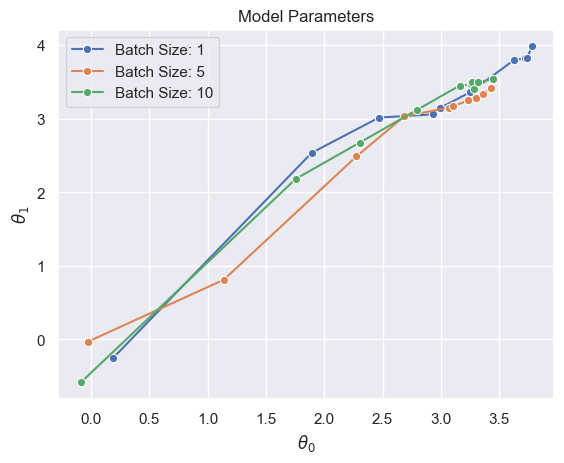

In [114]:
for b in range(len(batch_sizes)):
    theta_0 = theta[:, 0, b]
    theta_1 = theta[:, 1, b]

    sns.lineplot(x = theta_0, y = theta_1, marker = "o", label = f"Batch Size: {batch_sizes[b]}")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title("Model Parameters")

Text(0.5, 1.0, 'Mean Squared Error of Differing Batch Sizes after 10 Iterations')

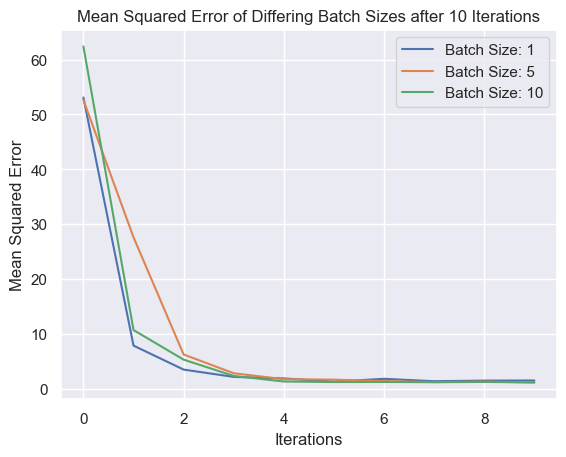

In [115]:
for b in range(len(batch_sizes)):
    sns.lineplot(x = np.arange(n_iterations), y = mse[:,b], label = f"Batch Size: {batch_sizes[b]}")

plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title(f"Mean Squared Error of Differing Batch Sizes after {n_iterations} Iterations")